In [180]:
!pip install matplotlib-venn


## Exploratory Data Analysis

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib_venn import venn3
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [183]:
df=pd.read_csv('crop_yield.csv')
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [184]:
df['Crop_Year'].unique()

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020], dtype=int64)

In [185]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [186]:
print(len(df))

19689


In [187]:
df.tail()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667
19688,Wheat,1997,Rabi,Jammu and Kashmir,239344.0,392160,1356.2,22778368.48,74196.64,1.261818


In [188]:
for label in df.columns:
    print(f"There are {df[label].isnull().sum()} null values in {label}")

There are 0 null values in Crop
There are 0 null values in Crop_Year
There are 0 null values in Season
There are 0 null values in State
There are 0 null values in Area
There are 0 null values in Production
There are 0 null values in Annual_Rainfall
There are 0 null values in Fertilizer
There are 0 null values in Pesticide
There are 0 null values in Yield


**So, there are zero null values in the dataset**

**Identifying outliners**

In [191]:
x=df.drop('Yield',axis=1)

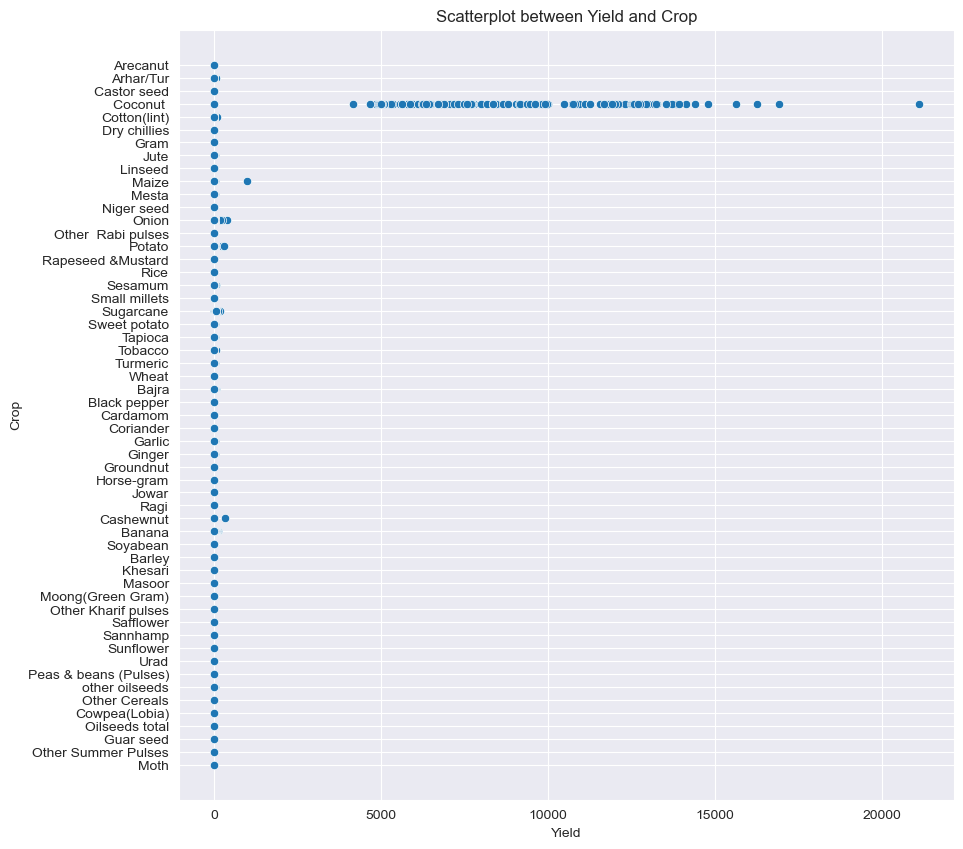

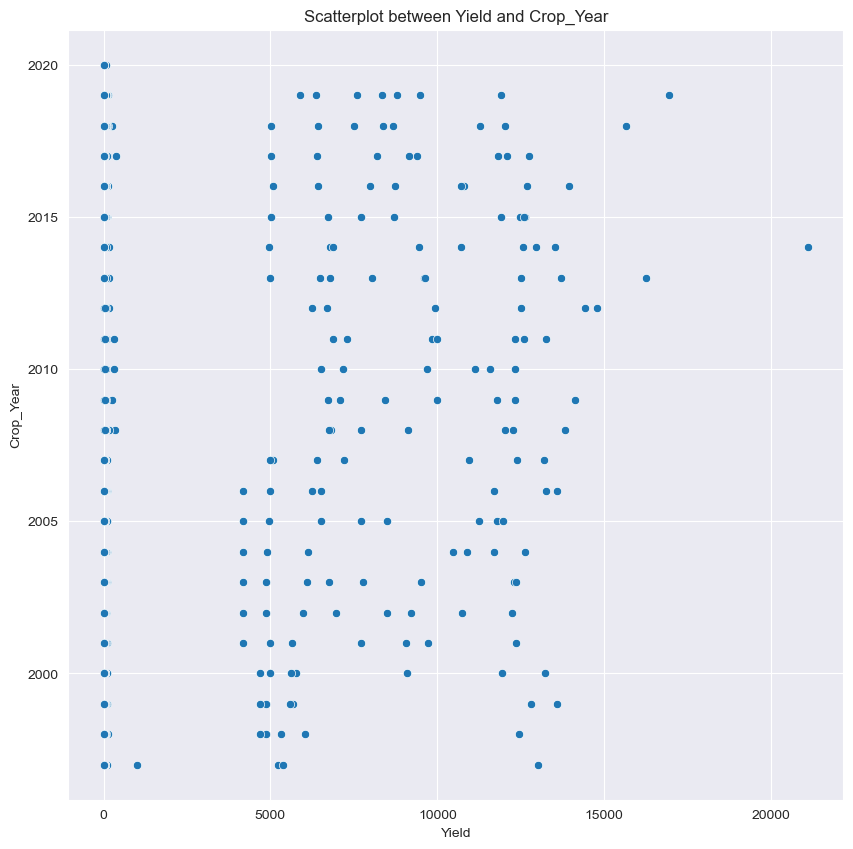

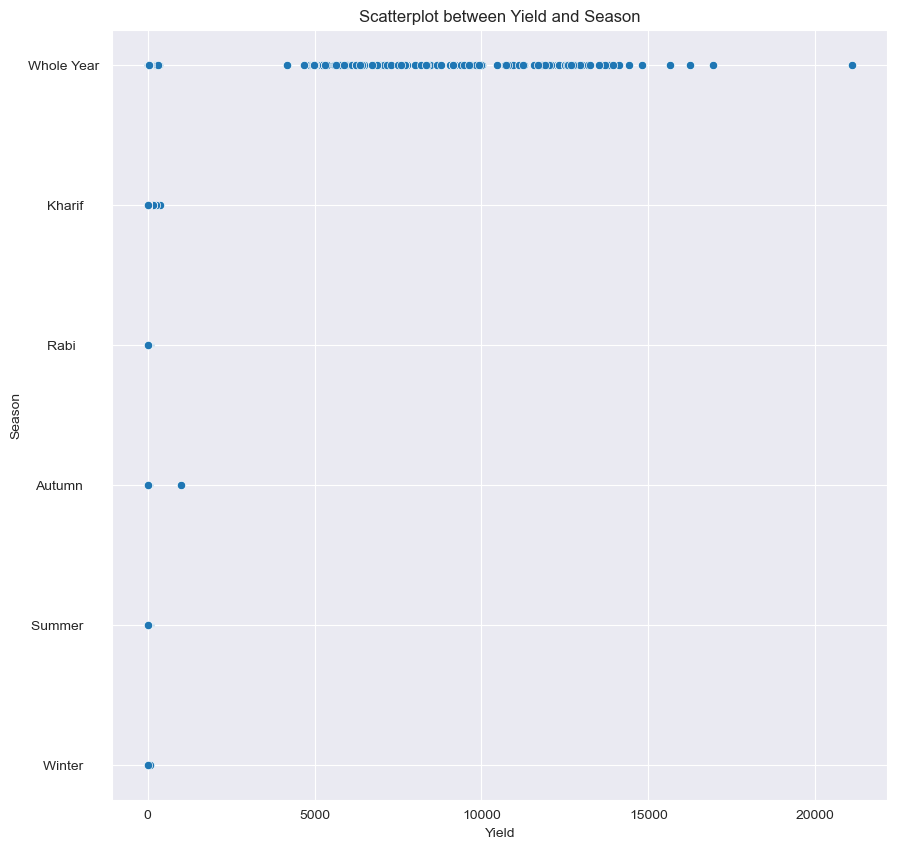

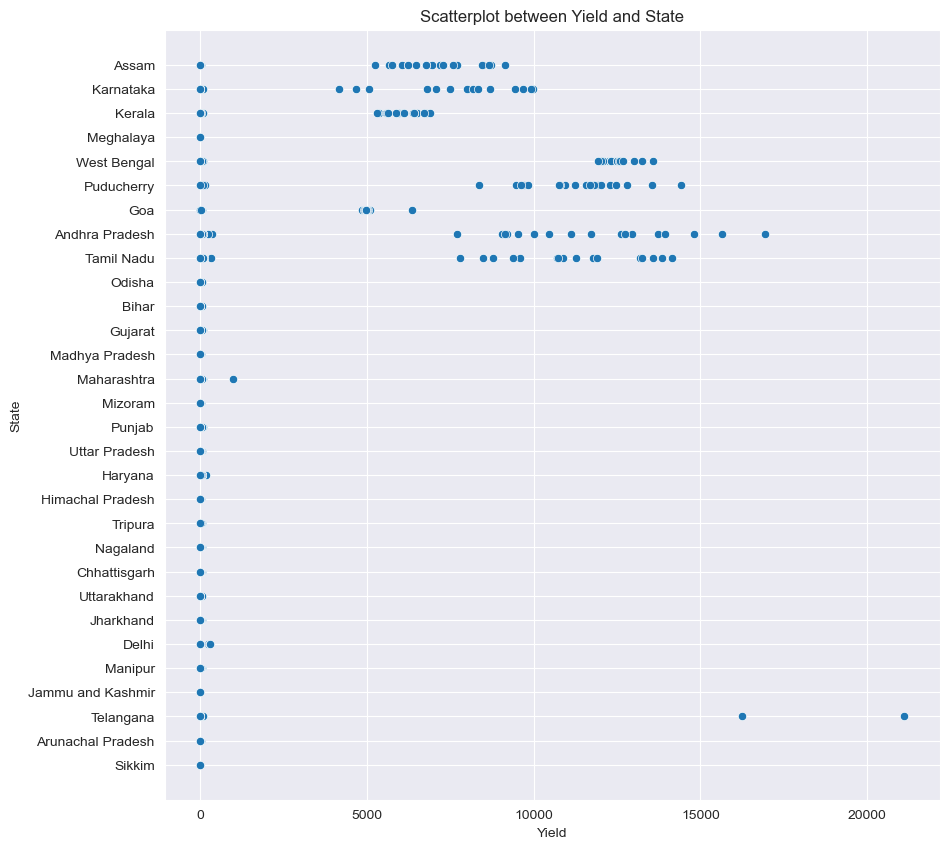

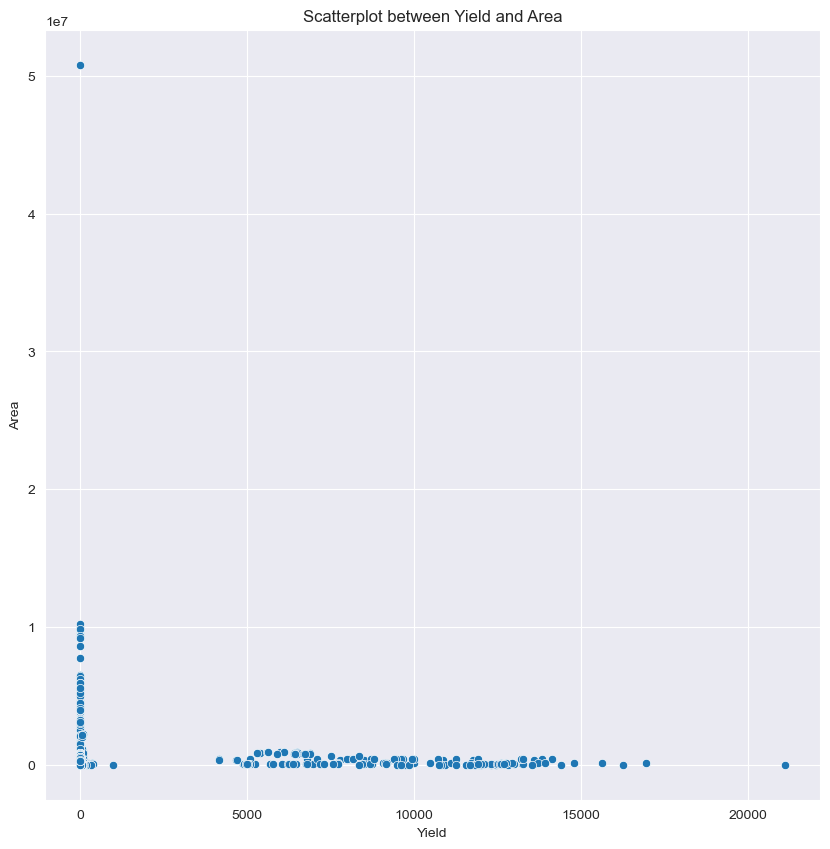

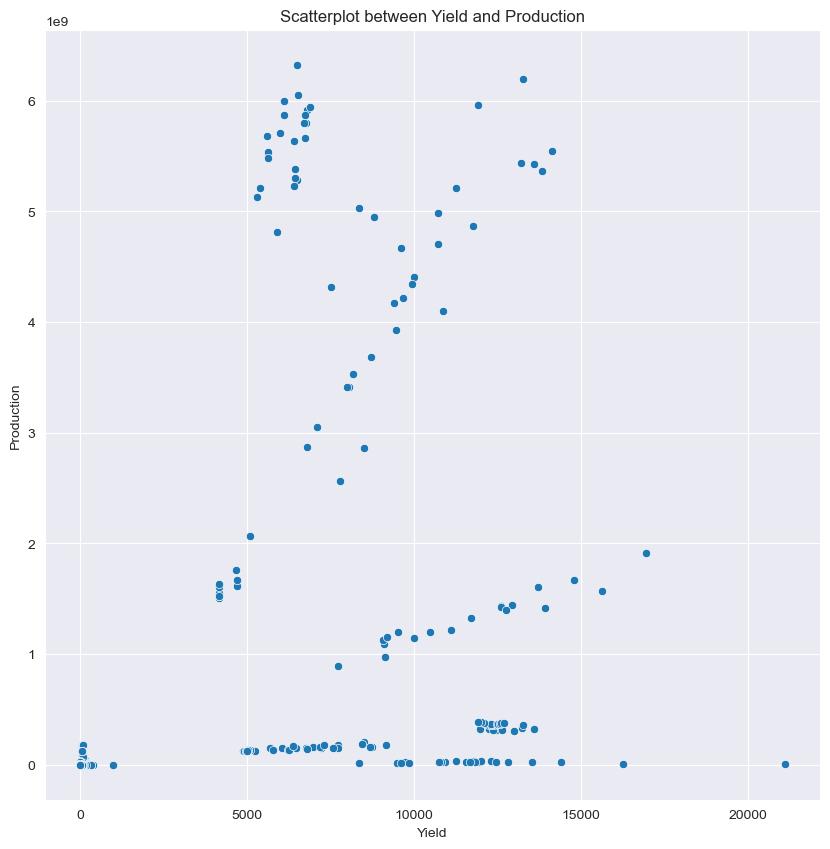

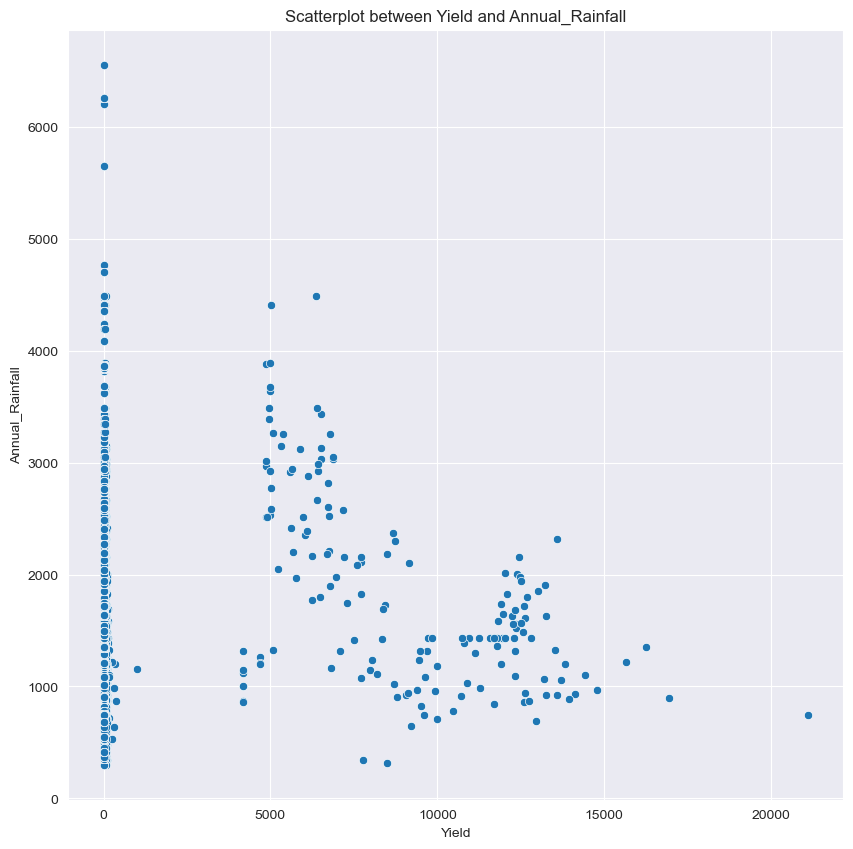

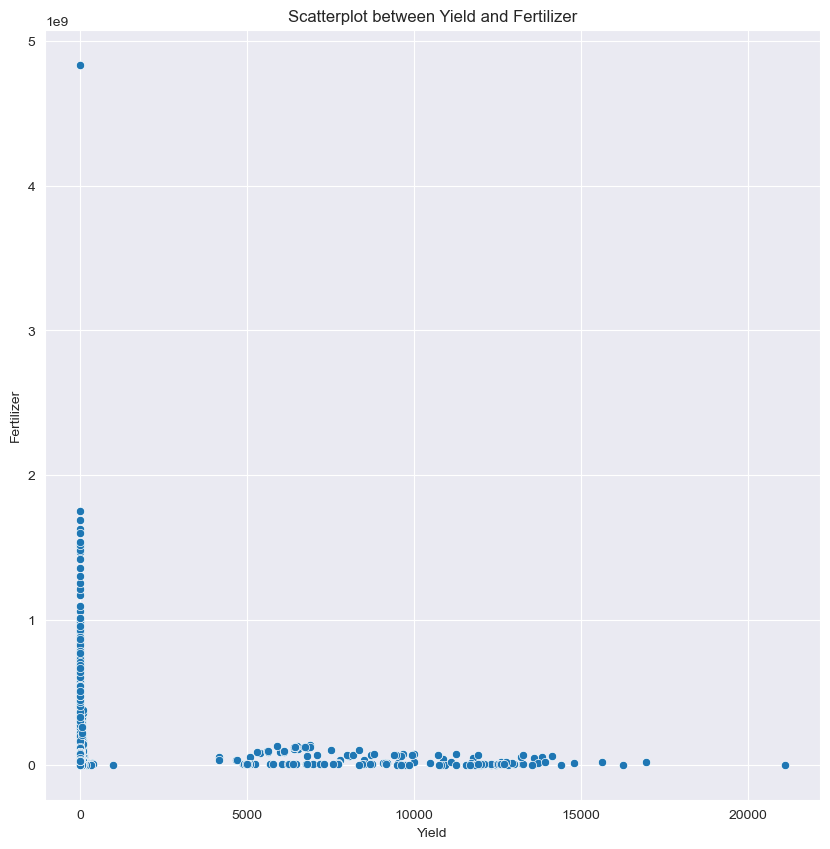

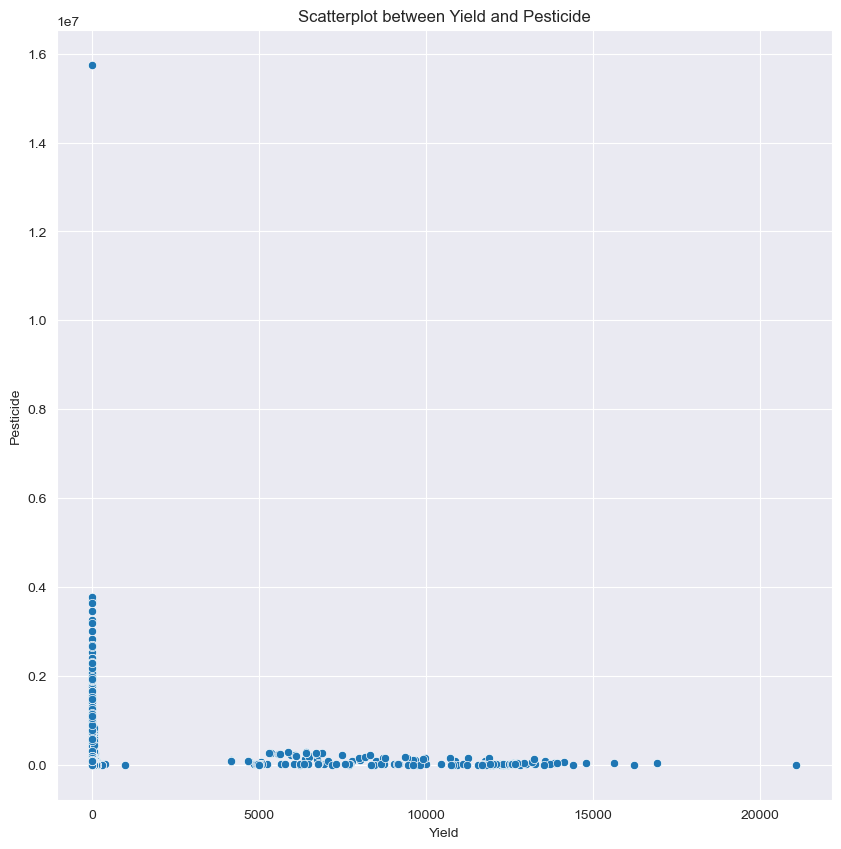

In [192]:
for label in x.columns: #outliners detection through scatterplot
    plt.figure(figsize=(10,10))
    sns.scatterplot(y=x[label],x=df['Yield'])
    plt.title(f'Scatterplot between Yield and {label}')
    plt.show()

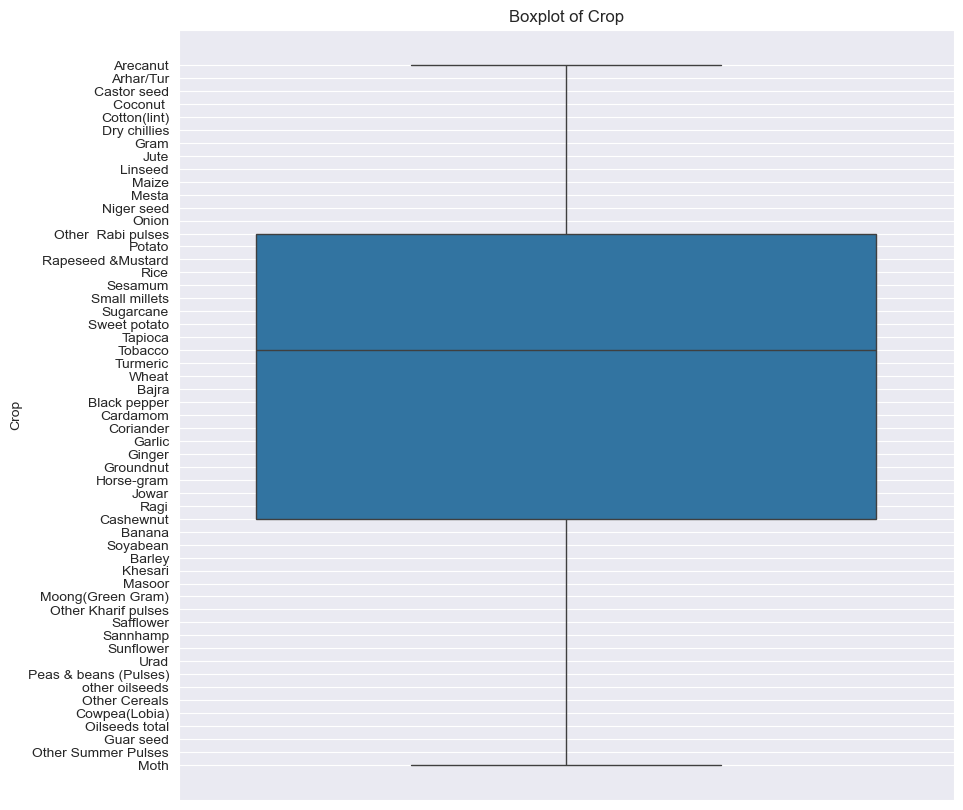

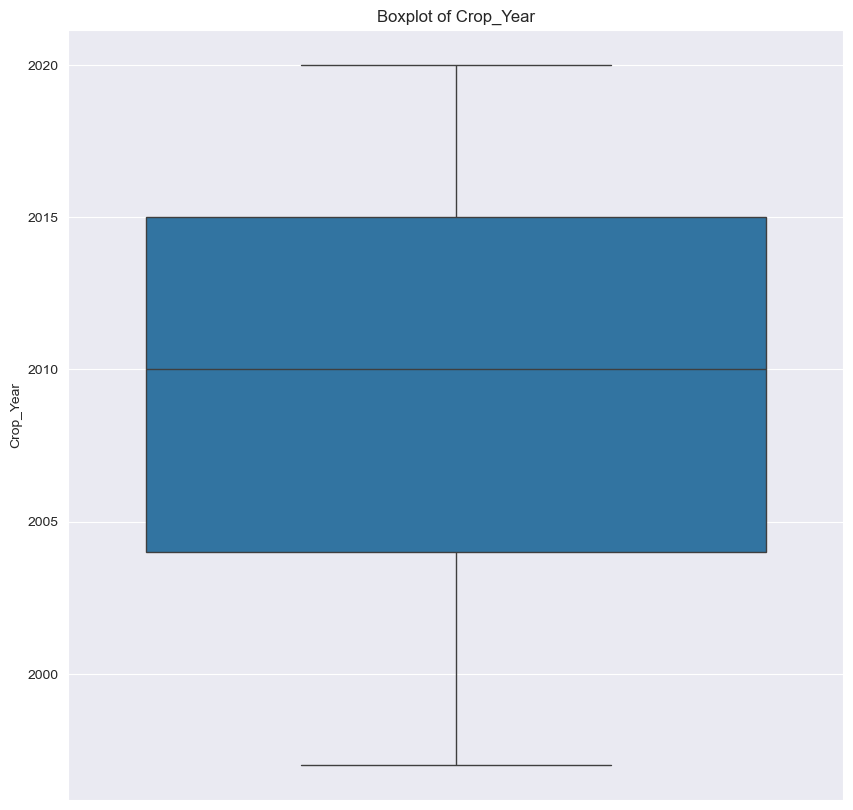

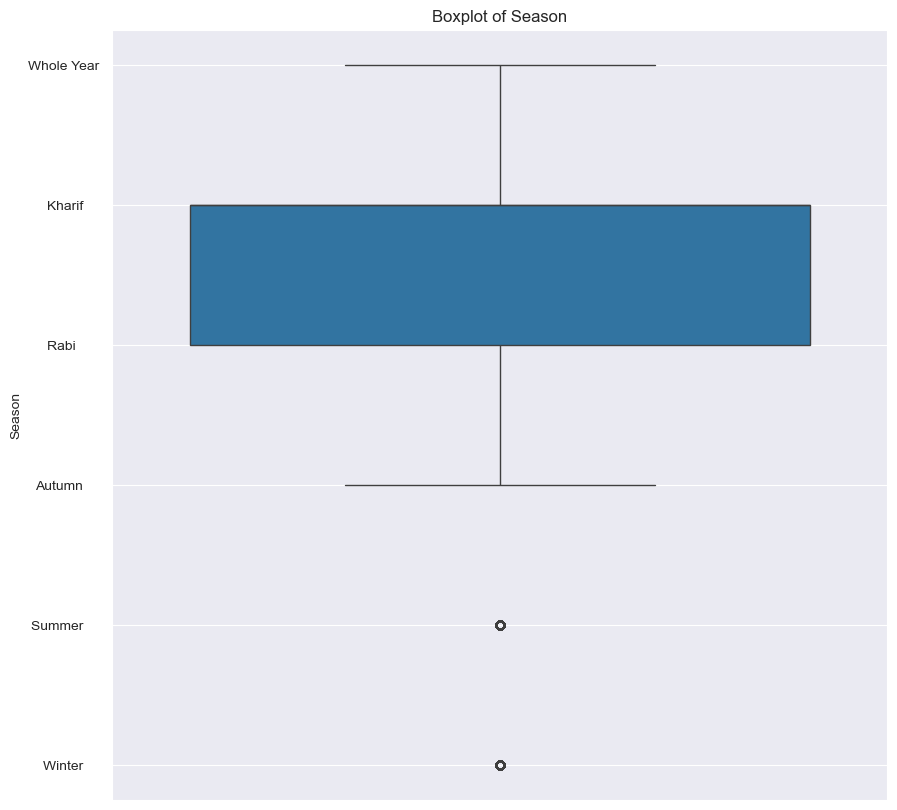

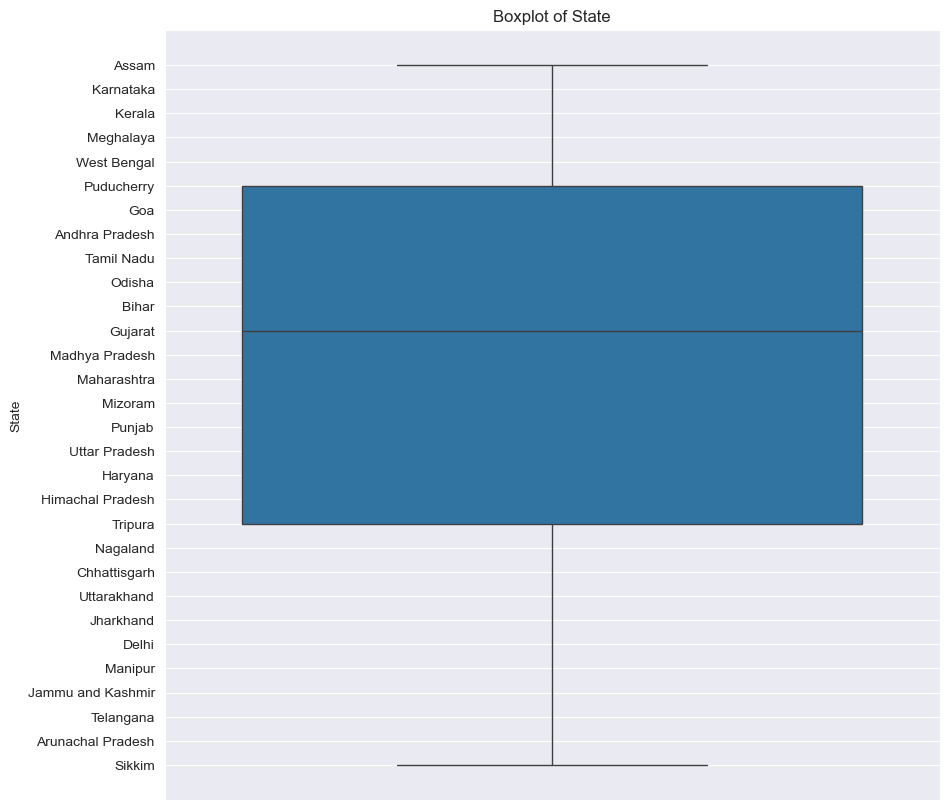

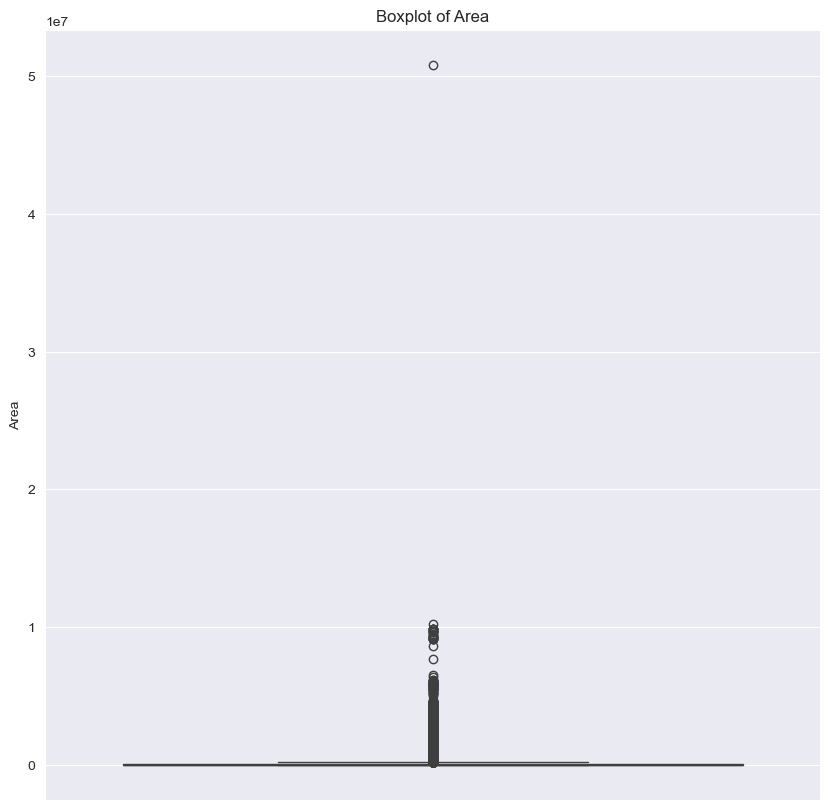

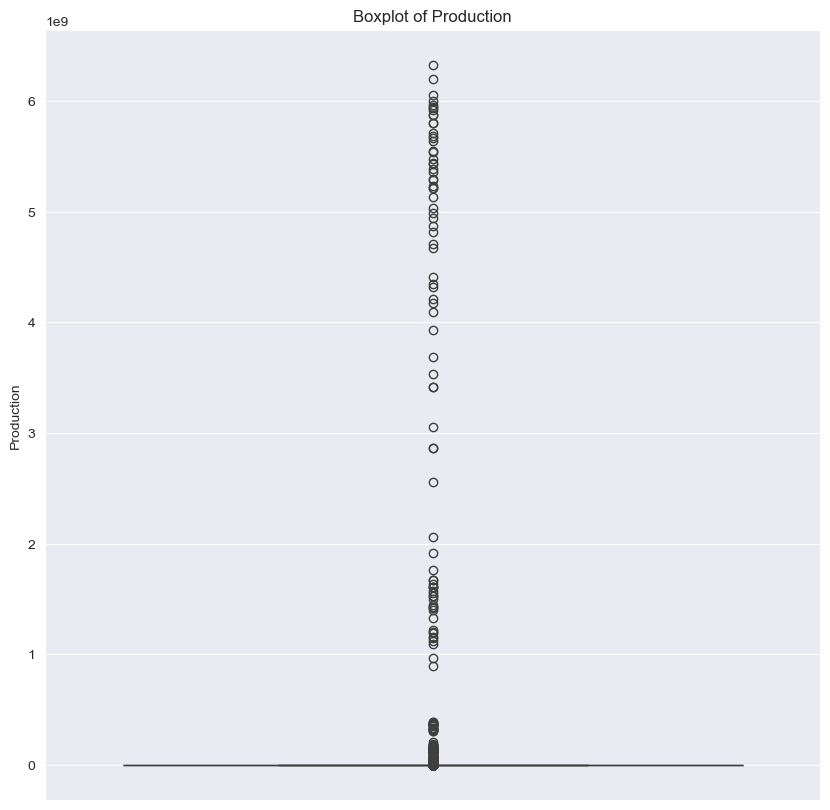

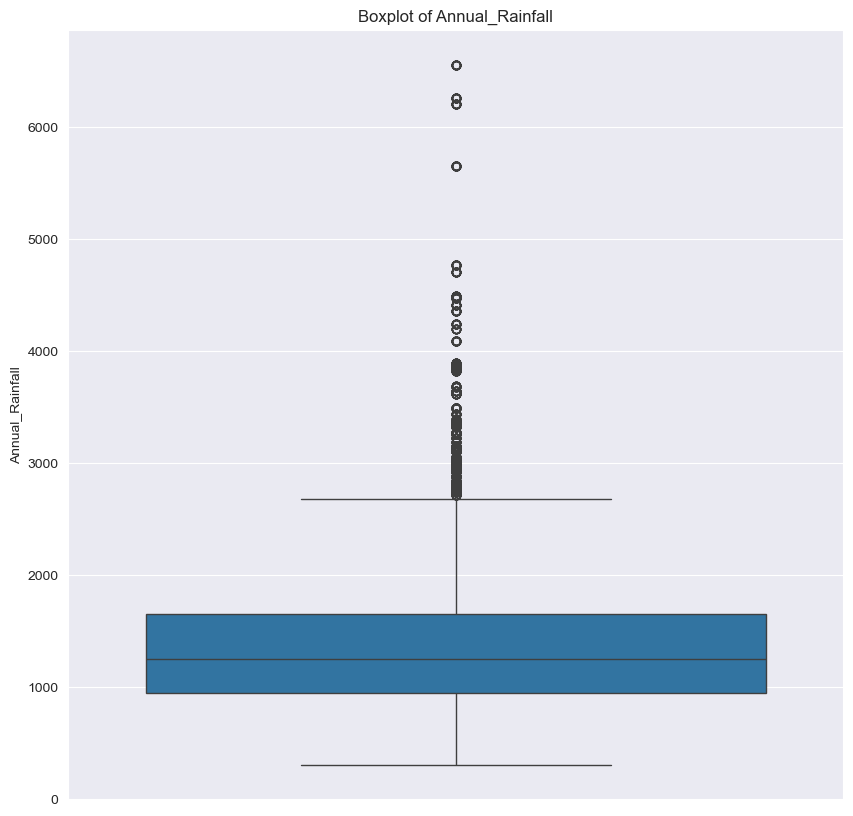

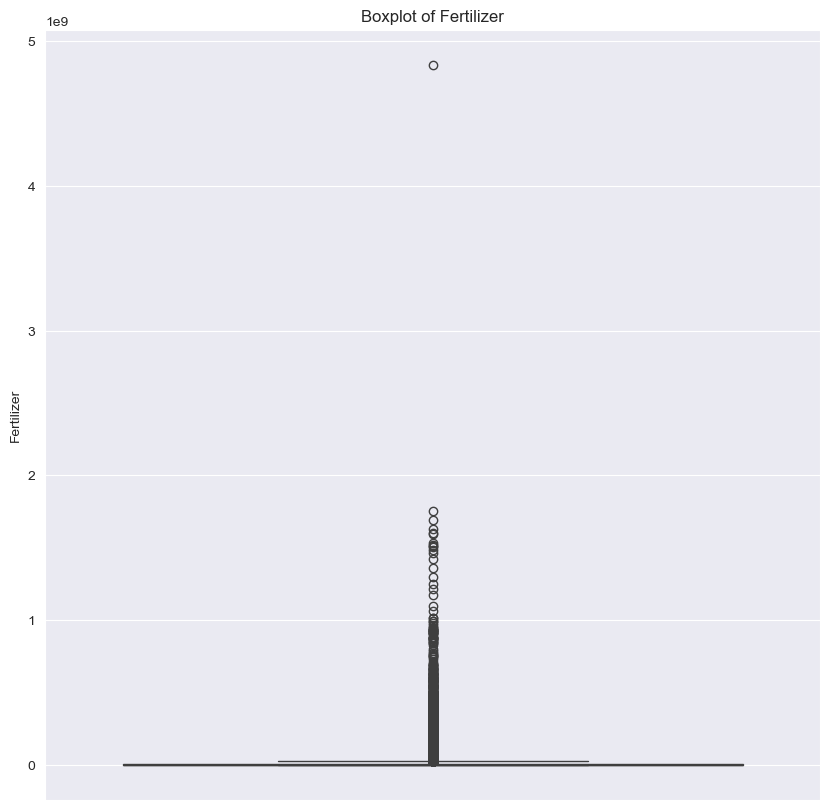

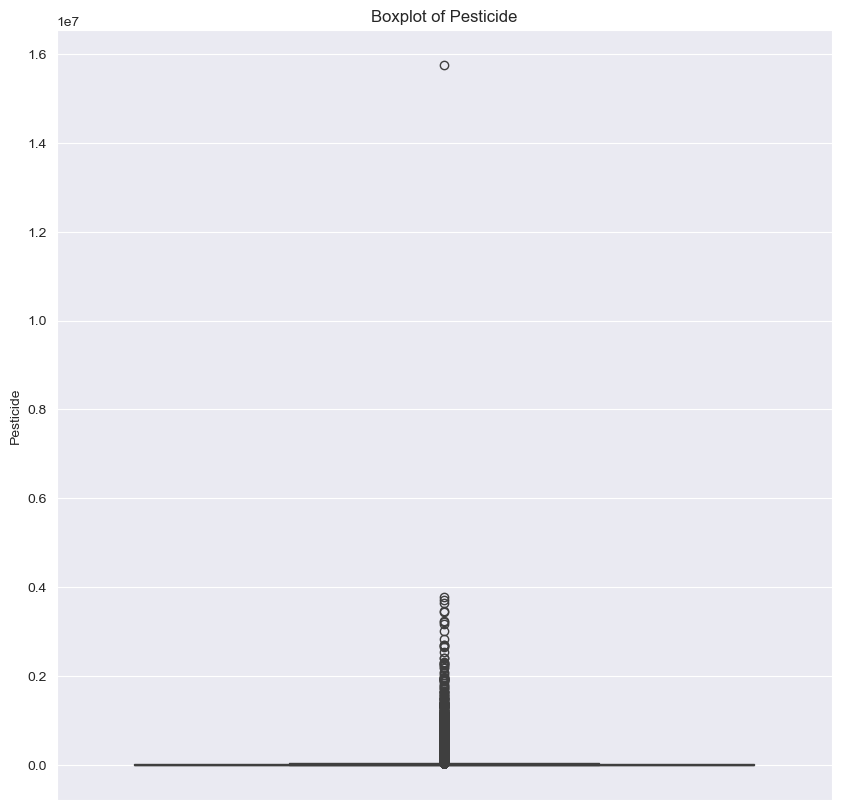

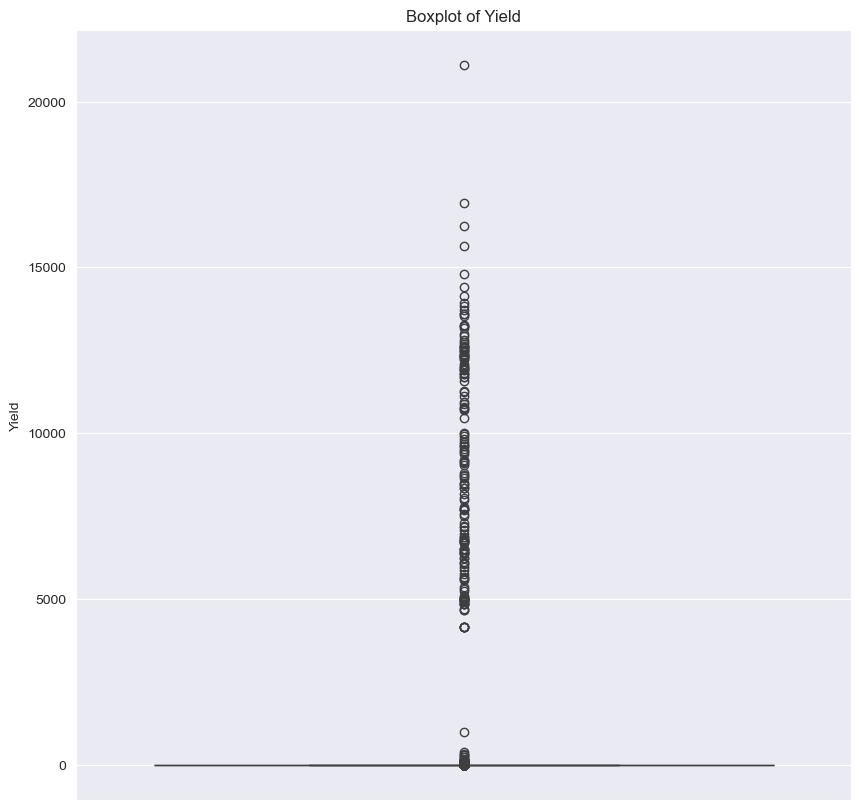

In [193]:
for label in df.columns: #outliners detection through boxplot
    plt.figure(figsize=(10,10))
    sns.boxplot(df[label])
    plt.title(f'Boxplot of {label}')
    plt.show()

**Treating outliners**

**Z-Score Method**

In [196]:
upper_limit=df['Yield'].mean()+3*df['Yield'].std()
lower_limit=df['Yield'].mean()-3*df['Yield'].std()
print(upper_limit)
print(lower_limit)

2714.8725870998687
-2554.964568839695


In [197]:
df.loc[(df['Yield']>upper_limit) | (df['Yield']<lower_limit)]

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4000,1870661.52,6093.36,5238.051739
60,Coconut,1997,Whole Year,Kerala,884344.0,5210000000,3252.4000,84163018.48,274146.64,5376.054286
94,Coconut,1997,Whole Year,West Bengal,24273.0,306202300,1852.9000,2310061.41,7524.63,13003.787780
150,Coconut,1998,Whole Year,Assam,20166.0,149866000,2354.4000,1992400.80,5848.14,6045.886957
178,Coconut,1998,Whole Year,Goa,24858.0,121000000,2964.9000,2455970.40,7208.82,4867.650000
...,...,...,...,...,...,...,...,...,...,...
18561,Coconut,2005,Whole Year,Puducherry,2194.0,29414000,1434.5875,263104.48,460.74,11250.412500
18855,Coconut,2004,Whole Year,Goa,25160.0,123520000,2518.0000,2725834.40,5283.60,4909.375000
18862,Coconut,2005,Whole Year,Goa,25312.0,125340000,3392.8000,3035415.04,5315.52,4951.730000
18869,Coconut,2006,Whole Year,Goa,25468.0,126680000,2928.8000,3252518.28,5602.96,4974.045000


In [198]:
#triming -delete the outlier data
updated_df=df.loc[(df['Yield']< upper_limit) & (df['Yield']>lower_limit)]
print('After removing outliners:',len(updated_df))
print('Outliers:',len(df)-len(updated_df))

After removing outliners: 19525
Outliers: 164


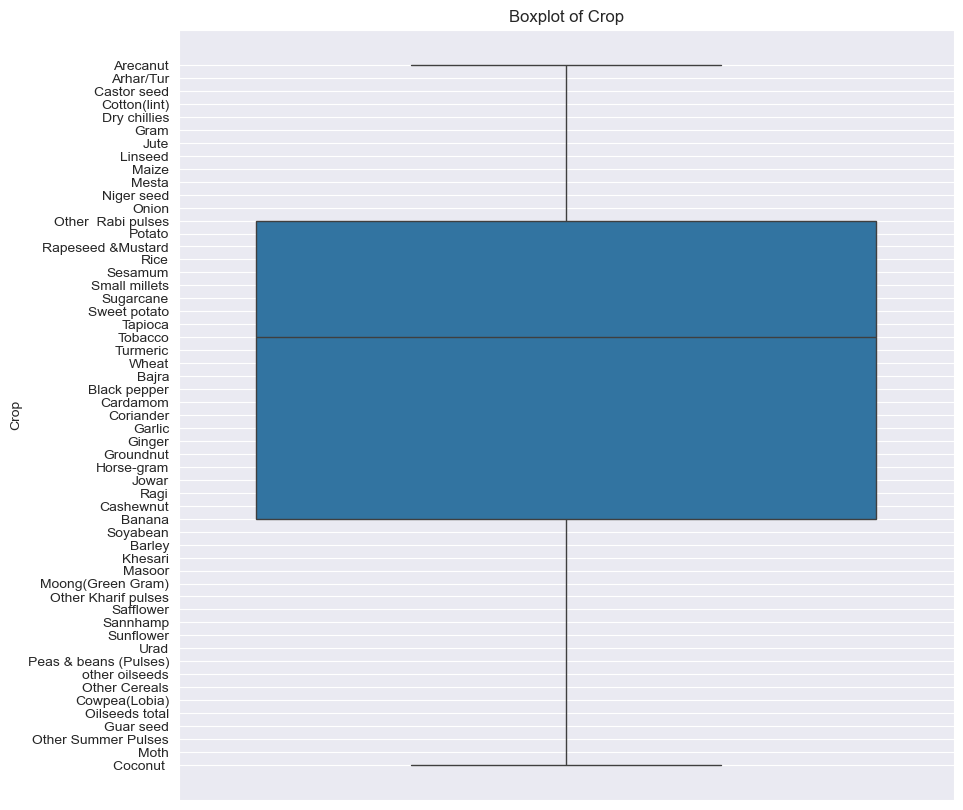

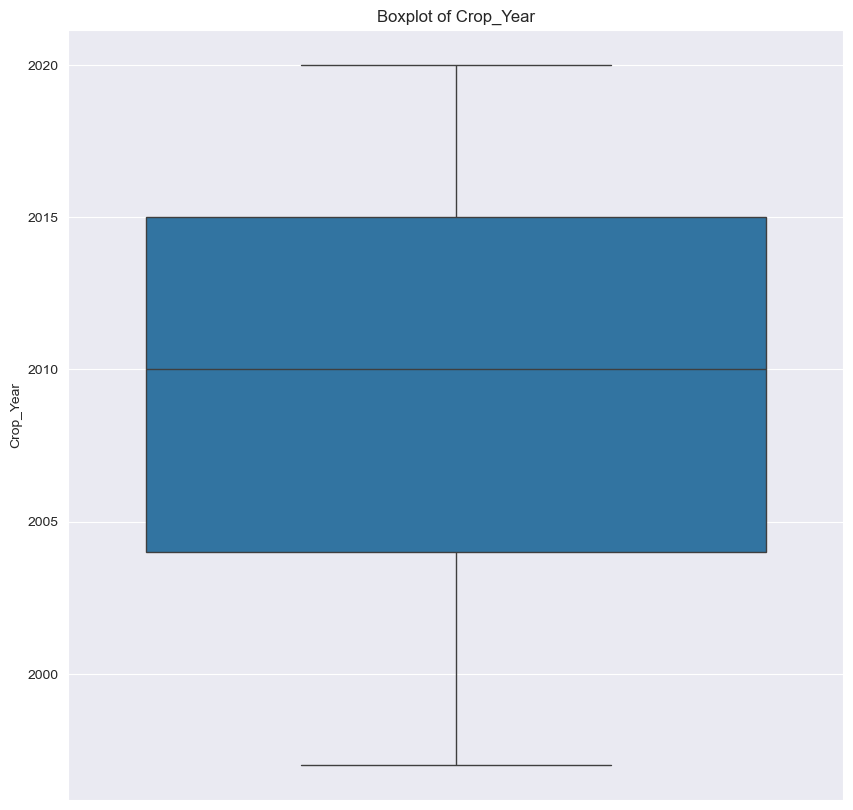

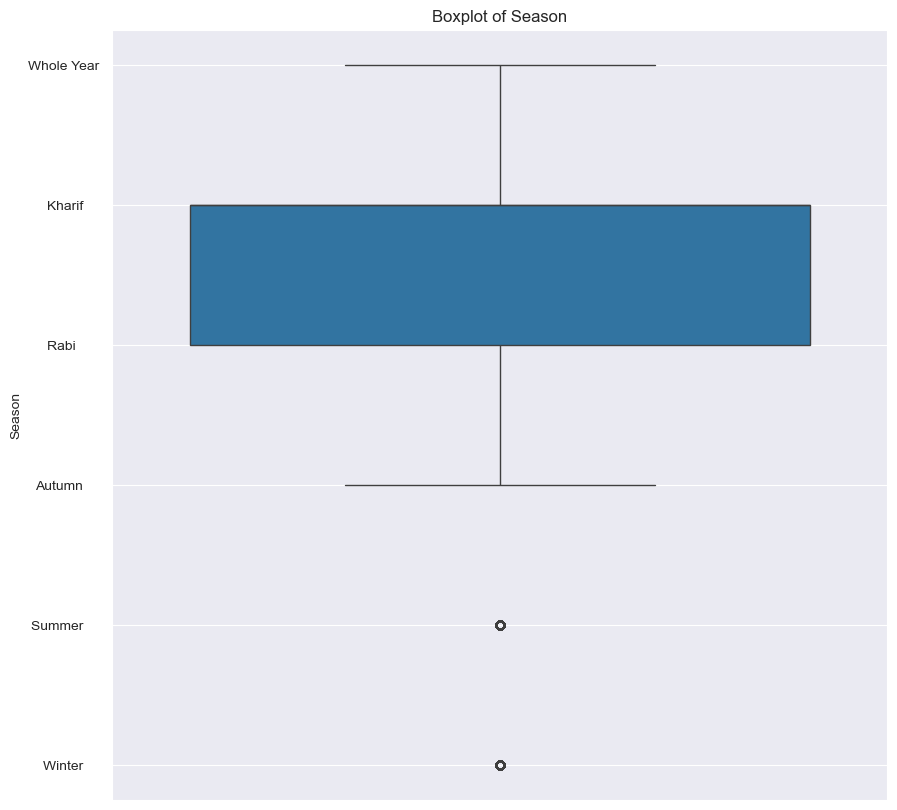

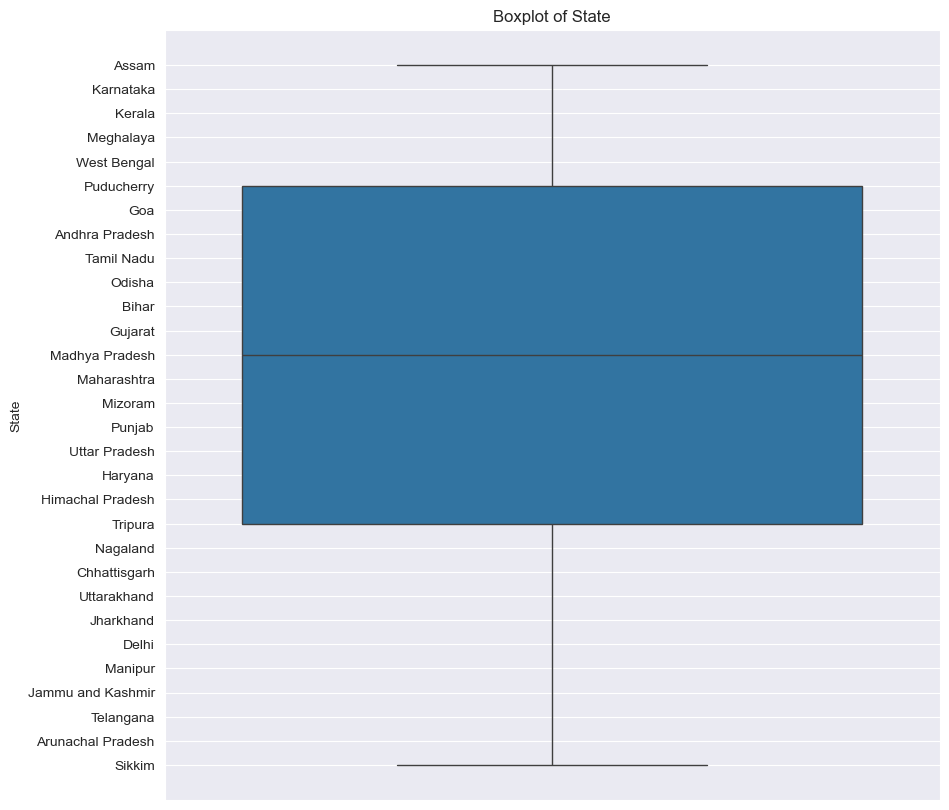

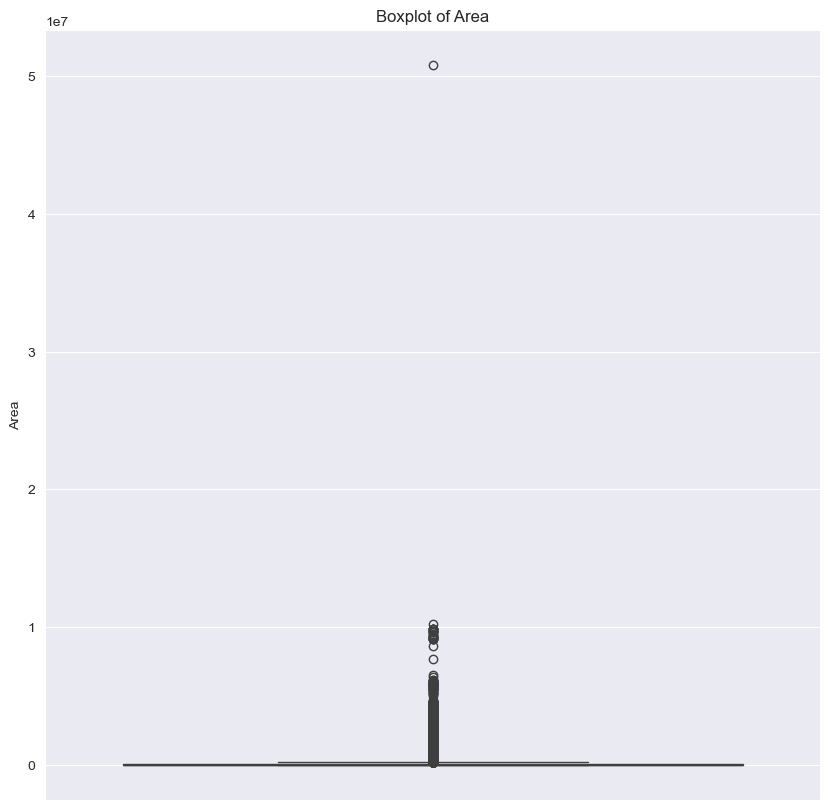

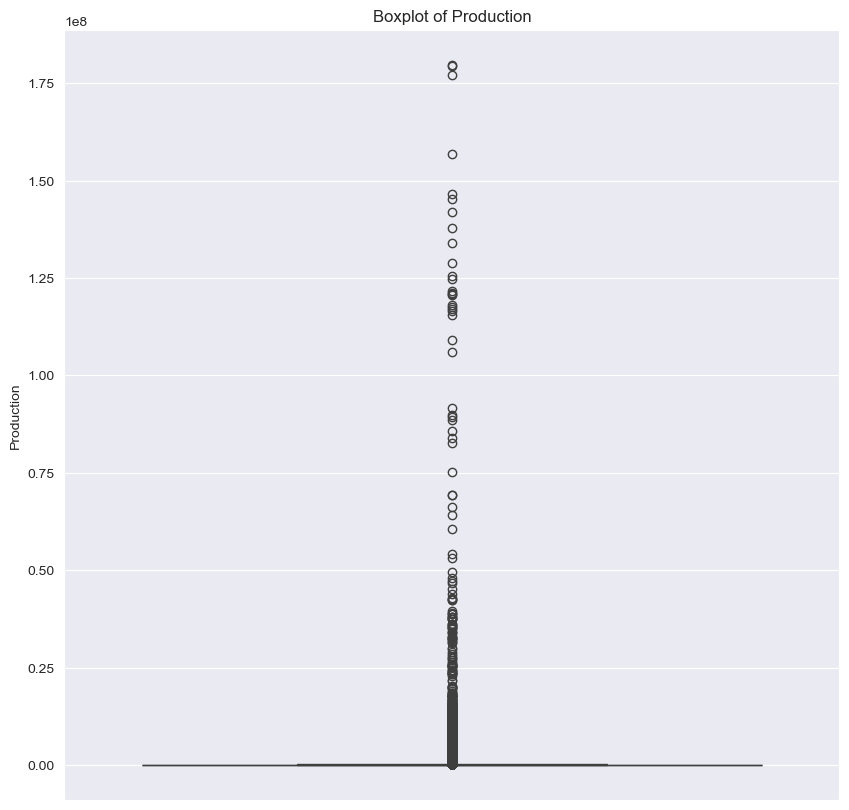

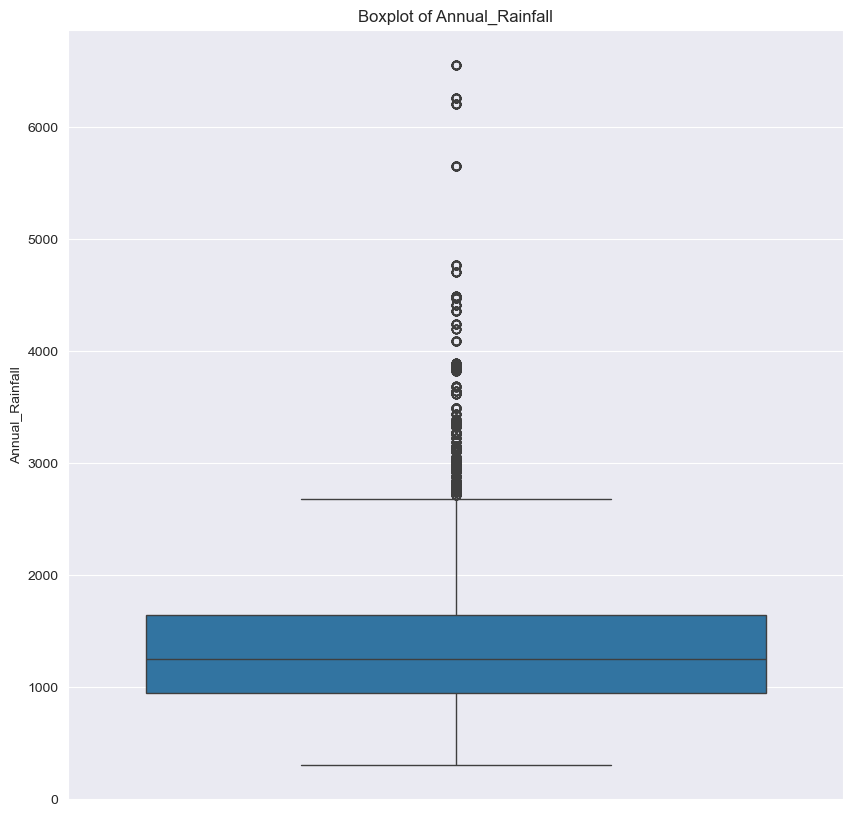

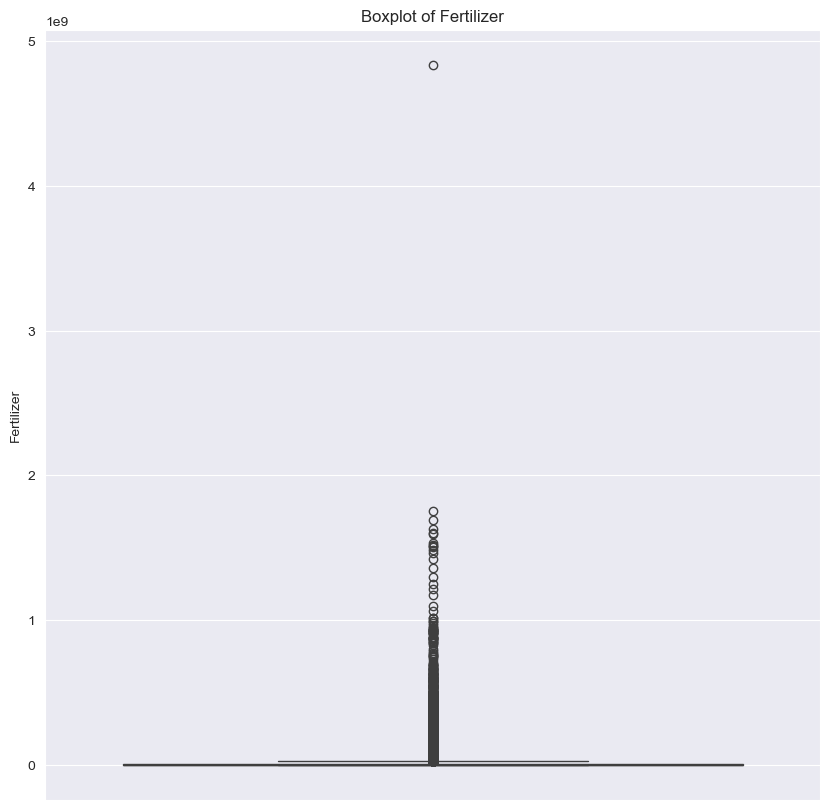

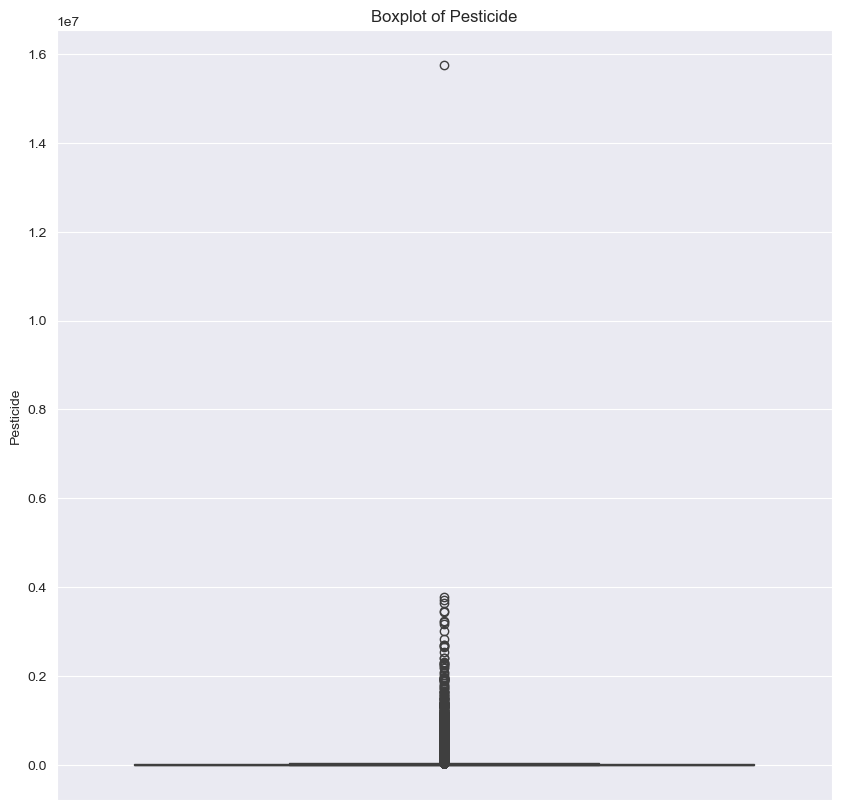

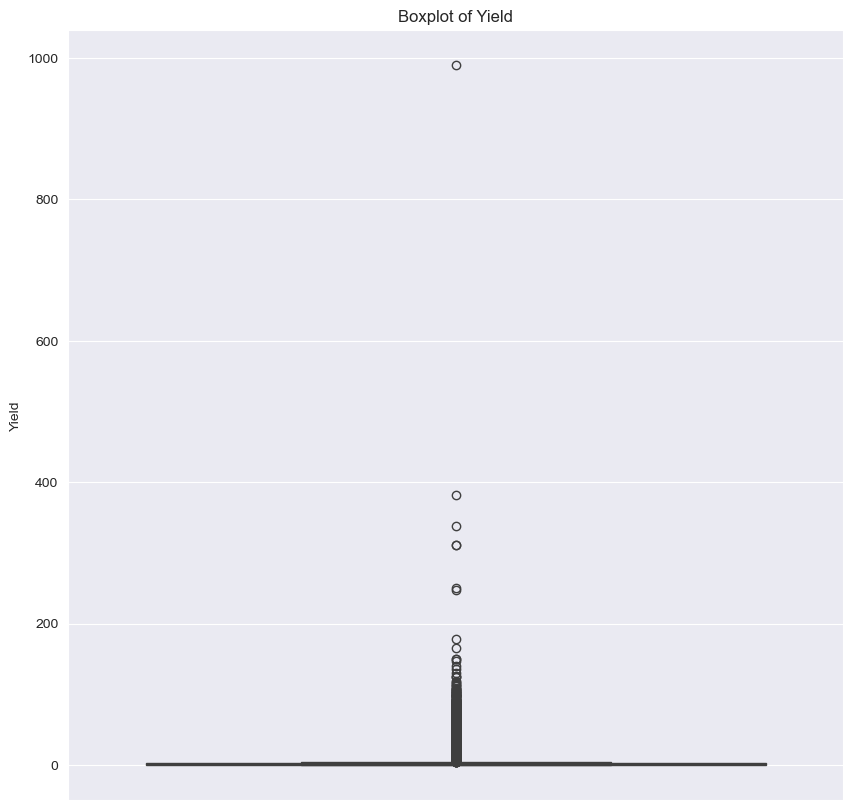

In [199]:
for label in updated_df.columns: #outliners detection through boxplot
    plt.figure(figsize=(10,10))
    sns.boxplot(updated_df[label])
    plt.title(f'Boxplot of {label}')
    plt.show()

 **Crops present in the dataset**

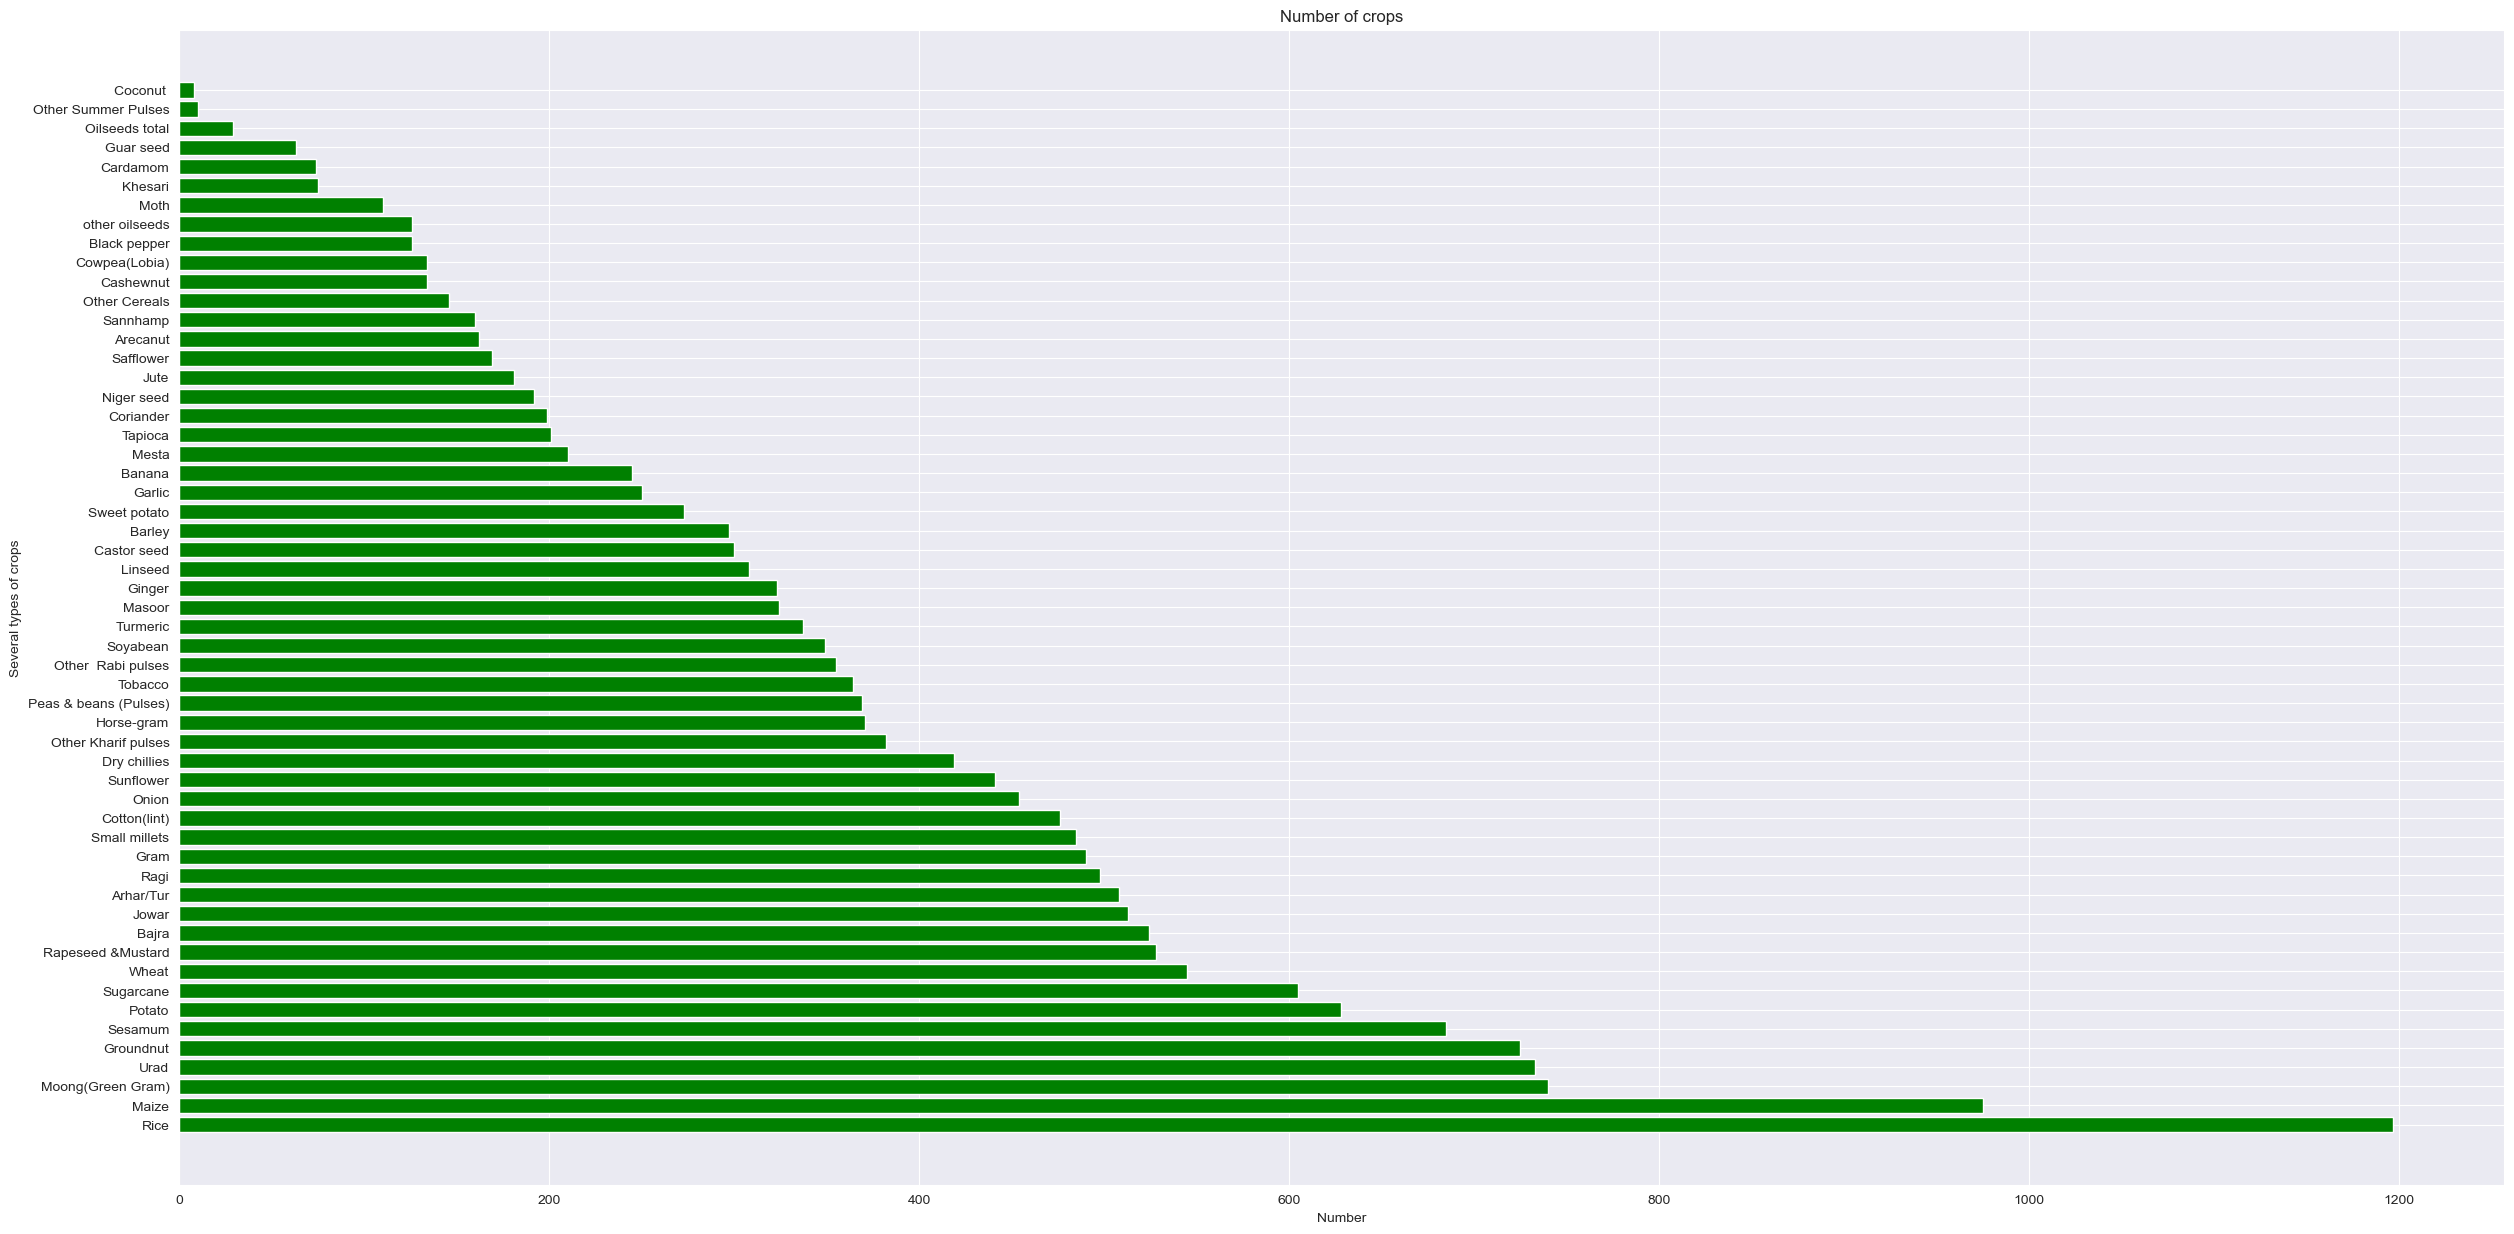

In [201]:
u=updated_df['Crop'].value_counts()
plt.figure(figsize=(30,15));
plt.barh(u.index,u.values,color="g");
plt.title("Number of crops");
plt.xlabel("Number");
plt.ylabel("Several types of crops");

**All the states present in the dataset**

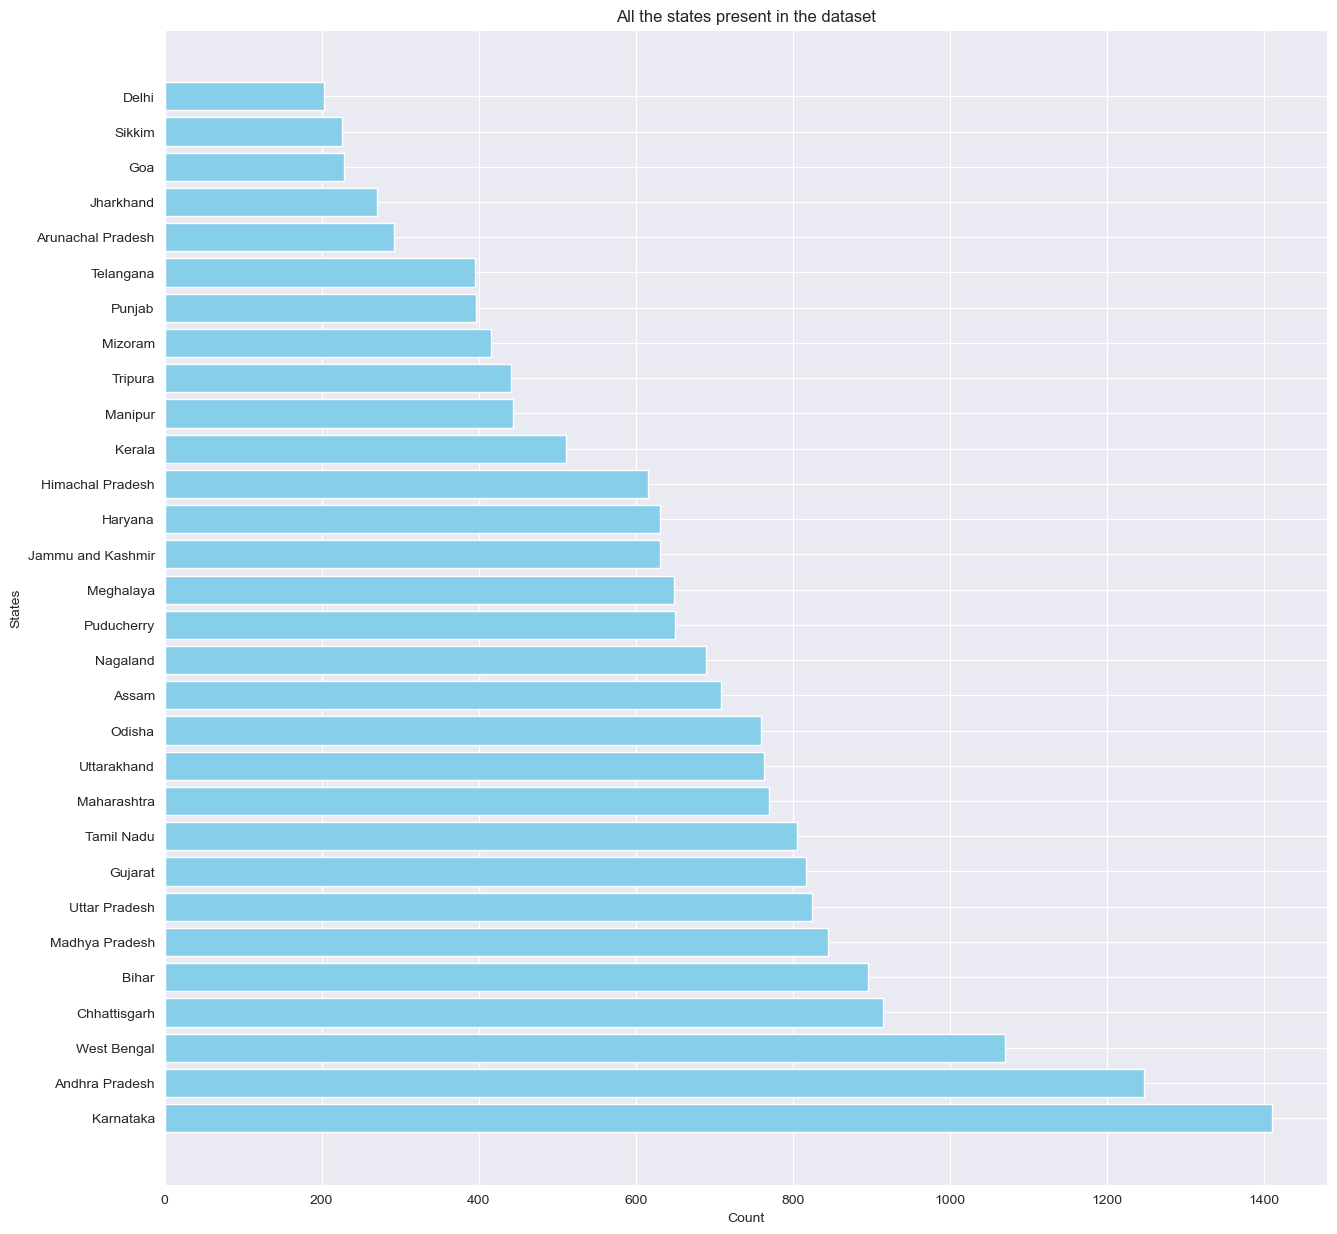

In [203]:
x=updated_df['State'].value_counts()
plt.figure(figsize=(15,15))
plt.barh(x.index,x.values,color='skyblue')
plt.title("All the states present in the dataset")
plt.xlabel("Count")
plt.ylabel("States")
plt.show()

**Relation between mean production and area for different states**

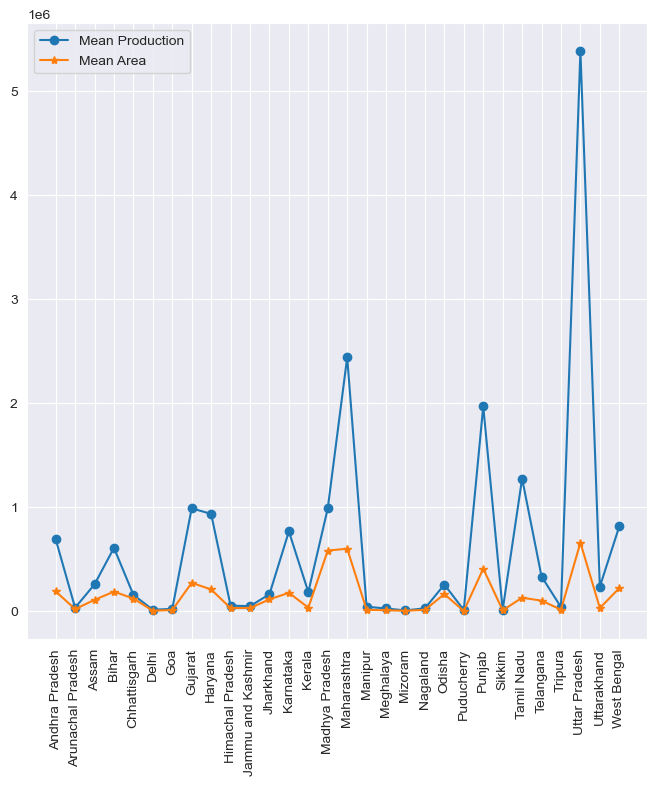

In [205]:
y=updated_df.groupby('State')[['Production']].mean();
x=updated_df.groupby('State')[['Area']].mean();
plt.figure(figsize=(8,8))
plt.plot(y,marker='o',label='Mean Production');
plt.plot(x,marker='*',label='Mean Area');
plt.legend()
plt.xticks(rotation=90);
#sns.pairplot(updated_df)


**What is the highest production in different years?**


In [207]:
z=updated_df.groupby('Crop_Year')[['Production']].max()
z

,Production
Crop_Year,
1997,121066703
1998,116483396
1999,115418883
2000,106067503
2001,117981573
2002,120948041
2003,117566725
2004,121755620
2005,125469871


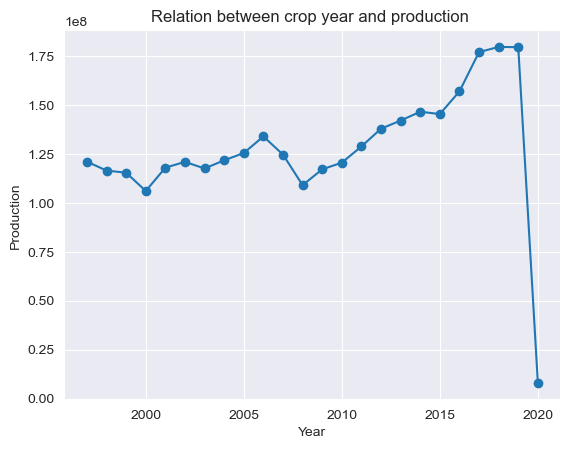

In [208]:
sns.set_style("darkgrid")
plt.plot(z,marker='o');
plt.title("Relation between crop year and production ");
plt.xlabel("Year");
plt.ylabel("Production");


**Highest yield of the crops present**

In [210]:
highest_yield=updated_df.groupby('Crop')[['Yield']].max()
highest_yield

,Yield
Crop,
Arecanut,10.948182
Arhar/Tur,68.230000
Bajra,74.303077
Banana,126.387692
Barley,3.988235
Black pepper,4.133571
Cardamom,2.870000
Cashewnut,338.548966
Castor seed,2.466333


**Which crop has the highest yield?**

In [212]:
max_=highest_yield['Yield'].max()
crop1 = highest_yield[highest_yield['Yield'] == max_]
crop1

,Yield
Crop,
Maize,989.87


**How many crops are harvested in different seasons**

In [214]:
k=updated_df.groupby('Season')[['Crop']].count()
k

,Crop
Season,
Autumn,414
Kharif,8232
Rabi,5742
Summer,1195
Whole Year,3553
Winter,389


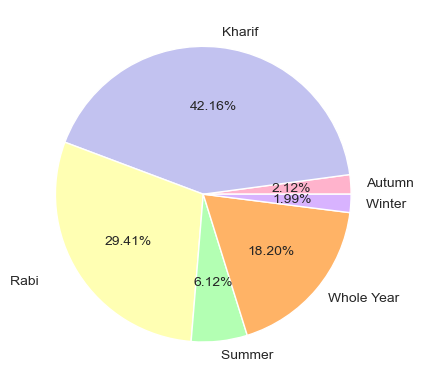

In [215]:
sizes = k['Crop'].values
labels = k.index
color=['#FFB3CC','#C2C2F0','#FFFFB3','#B3FFB3','#FFB366','#D8B3FF']
plt.pie(sizes,labels=labels,autopct='%0.2f%%',colors=color)
plt.show()

**Venn Diagram (Area,Yield,Production)**

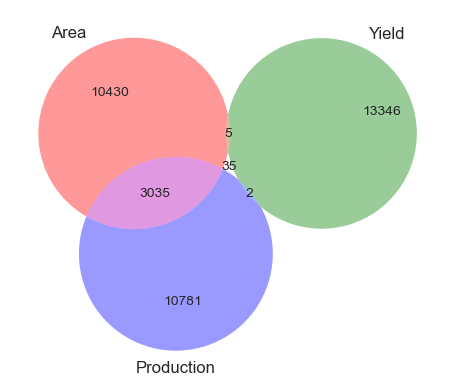

In [217]:
set1=set(updated_df['Area'])

set2=set(updated_df['Yield'])
set3=set(updated_df['Production'])
venn3([set1,set2,set3], set_labels=('Area','Yield','Production'))

In [218]:
heat=updated_df[['Area','Yield','Production']]

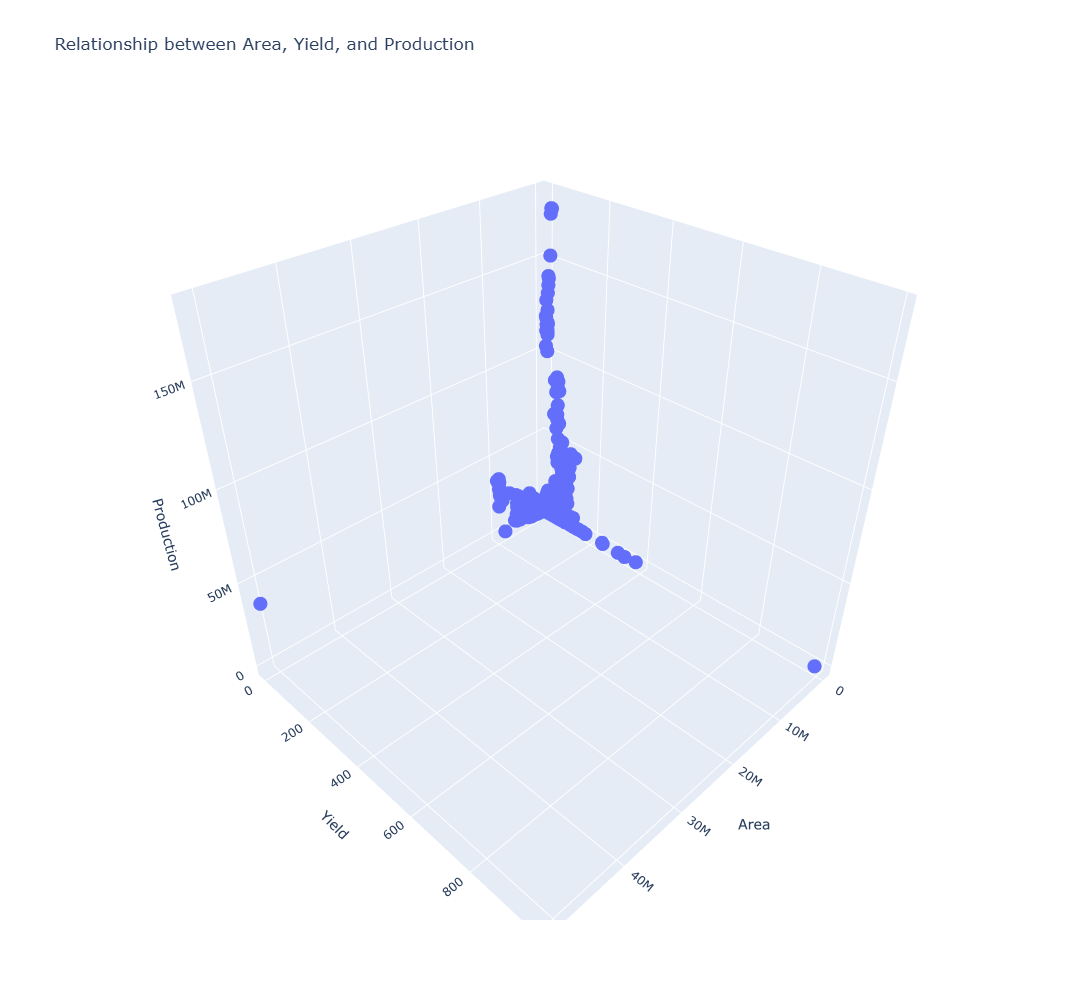

In [219]:
fig = px.scatter_3d(
    heat, x='Area', y='Yield', z='Production',
    title='Relationship between Area, Yield, and Production',
    width=1000, 
    height=1000 
)

fig.show()

**What is the average yield per crop?**


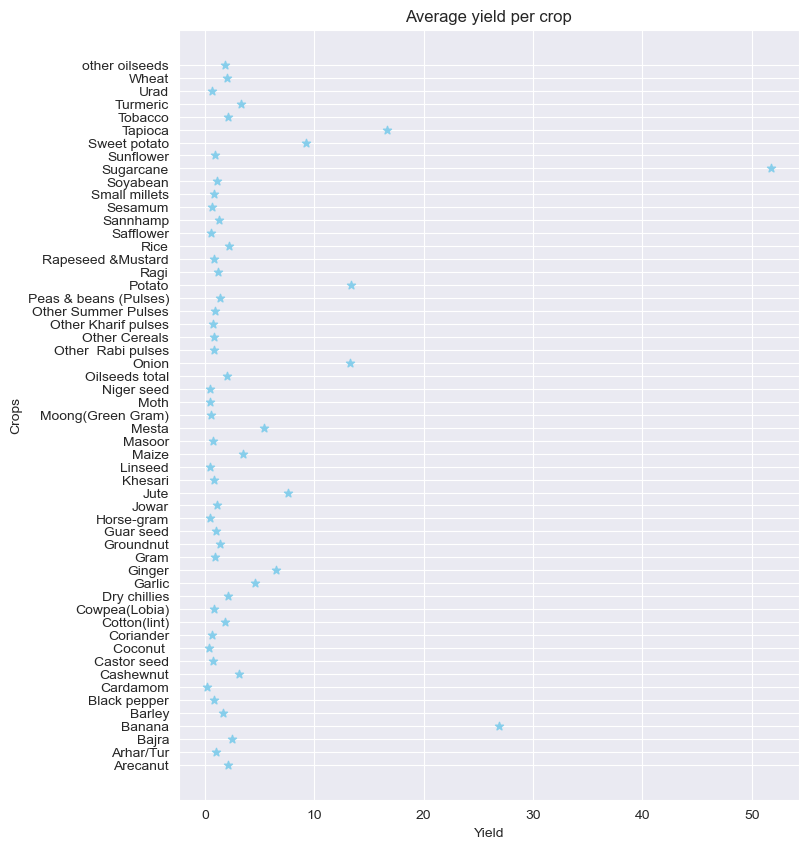

In [221]:
df=updated_df.groupby('Crop')[['Yield']].mean()
plt.figure(figsize=(8,10))
plt.scatter(df['Yield'],df.index,color='skyblue',marker="*")
plt.title("Average yield per crop")
plt.xlabel("Yield")
plt.ylabel("Crops")
plt.show()

**Which year had the highest yield of different crops?**



In [223]:
l=updated_df.groupby('Crop')[['Crop_Year','Yield']].max()
l

,Crop_Year,Yield
Crop,,
Arecanut,2019,10.948182
Arhar/Tur,2020,68.230000
Bajra,2019,74.303077
Banana,2019,126.387692
Barley,2020,3.988235
Black pepper,2019,4.133571
Cardamom,2019,2.870000
Cashewnut,2019,338.548966
Castor seed,2019,2.466333


<Axes: ylabel='Crop'>

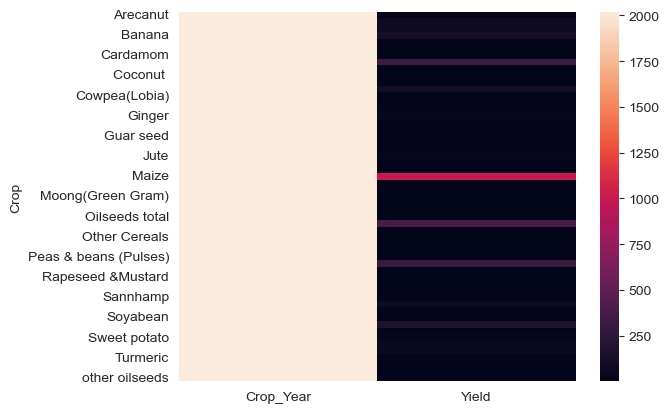

In [224]:
sns.heatmap(l)

**Which state that receives the highest annual rainfall** 

In [226]:
rain=updated_df.groupby('State')[['Annual_Rainfall']].max()
rain

,Annual_Rainfall
State,
Andhra Pradesh,1297.0
Arunachal Pradesh,3616.7
Assam,2578.5
Bihar,1600.2
Chhattisgarh,1643.7
Delhi,989.5
Goa,4489.5
Gujarat,1125.4
Haryana,715.6


In [227]:
max=rain['Annual_Rainfall'].max()
state=rain[rain['Annual_Rainfall']==max]
state

,Annual_Rainfall
State,
Meghalaya,6552.7


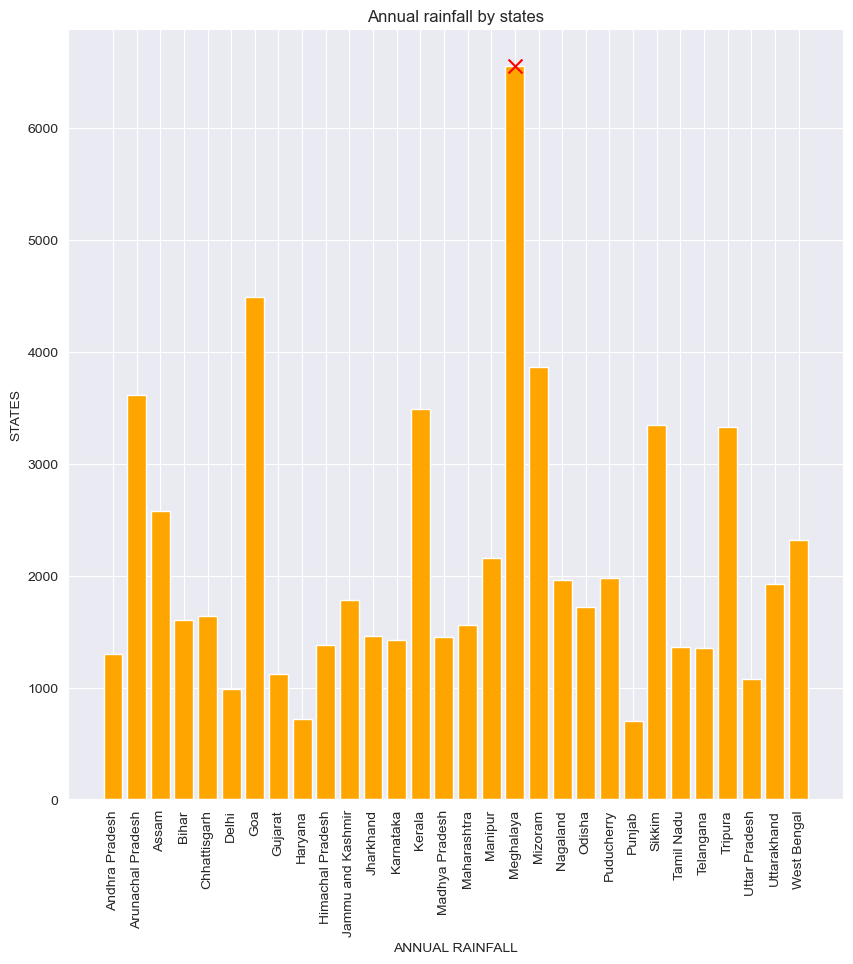

In [228]:
plt.figure(figsize=(10,10))
plt.bar(rain.index,rain['Annual_Rainfall'],color="orange")
plt.scatter(state.index,state['Annual_Rainfall'],color="red",s=100,marker='x')
plt.xticks(rotation=90)
plt.title("Annual rainfall by states")
plt.xlabel("ANNUAL RAINFALL")
plt.ylabel("STATES")

plt.show()

**How much area is available in different states for cultivation?**

In [230]:
max_area=updated_df.groupby('State')[['Area']].max()
max_area

,Area
State,
Andhra Pradesh,3003673.0
Arunachal Pradesh,133500.0
Assam,1890960.0
Bihar,4238204.0
Chhattisgarh,4266022.0
Delhi,33505.0
Goa,56735.0
Gujarat,3003100.0
Haryana,2628000.0


In [231]:
mar=max_area['Area'].max()
state1=max_area[max_area['Area']==mar]
state1

,Area
State,
West Bengal,50808100.0


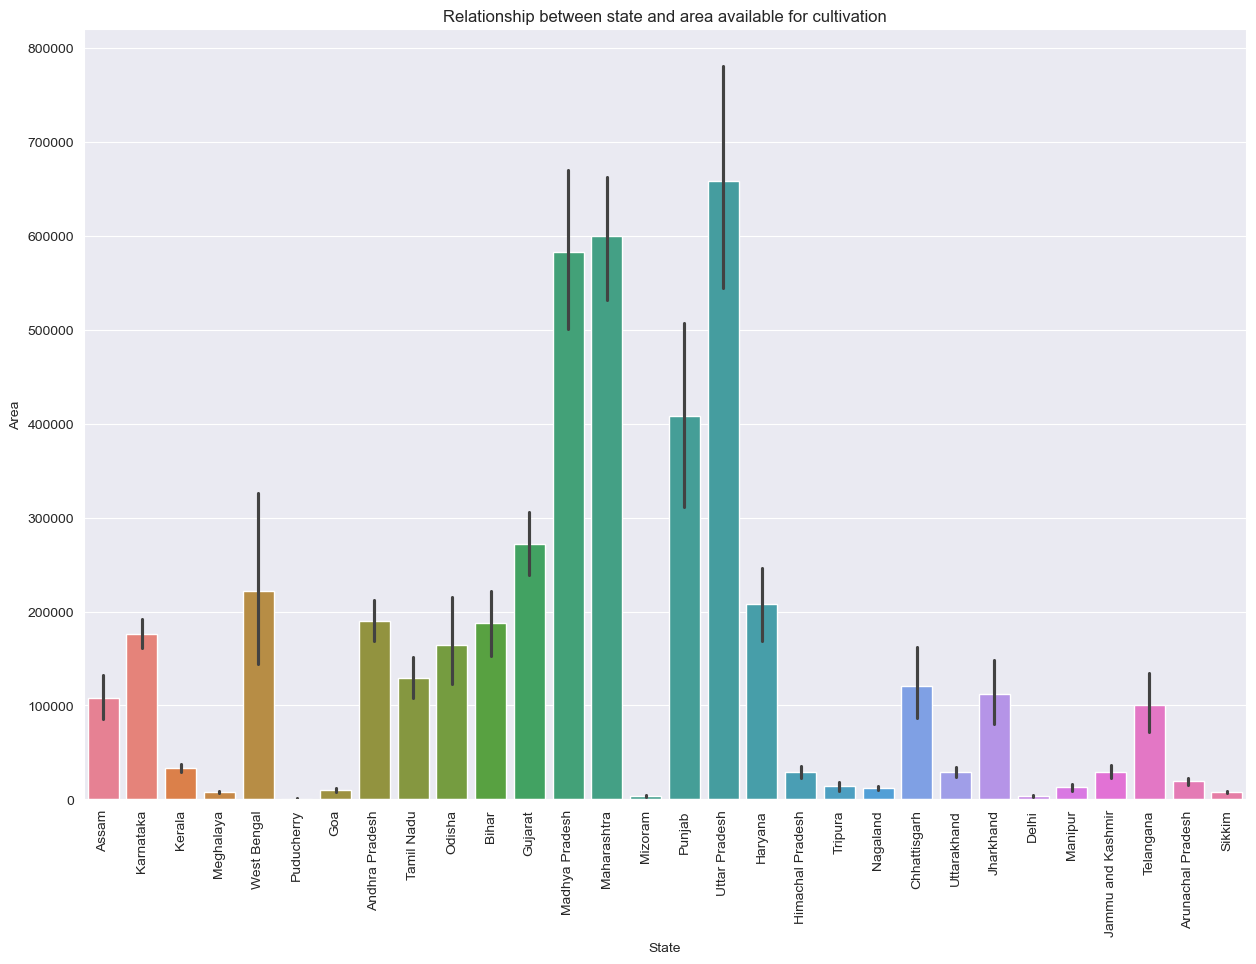

In [232]:
plt.figure(figsize=(15,10))
sns.barplot(x='State',y='Area',hue='State',data=updated_df);
plt.title('Relationship between state and area available for cultivation')
plt.xticks(rotation=90);

**How much fertilizer and pesticide were used to get the highest yield?**



In [234]:
high_f_p=updated_df.groupby('Crop')[['Fertilizer','Pesticide','Yield']].max()
high_f_p

,Fertilizer,Pesticide,Yield
Crop,,,
Arecanut,8.596966e+07,1.851931e+05,10.948182
Arhar/Tur,2.793486e+08,6.017639e+05,68.230000
Bajra,1.854605e+08,5.180720e+05,74.303077
Banana,1.771377e+07,3.614715e+04,126.387692
Barley,3.319417e+07,1.044815e+05,3.988235
Black pepper,2.860108e+07,5.948638e+04,4.133571
Cardamom,6.818357e+06,1.485040e+04,2.870000
Cashewnut,2.310067e+07,4.550634e+04,338.548966
Castor seed,1.470323e+08,2.896410e+05,2.466333


## Feature Engineering

In [236]:
updated_df

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909
5,Dry chillies,1997,Whole Year,Assam,13587.0,9073,2051.4,1293074.79,4211.97,0.643636
...,...,...,...,...,...,...,...,...,...,...
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667


In [237]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#label Encoding
label=['Crop','Crop_Year','Season','State']
for lab in label:
    updated_df[lab] = le.fit_transform(updated_df[lab])

In [238]:
updated_df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,0,0,4,2,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,1,0,1,2,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,8,0,1,2,796.0,22,2051.4,75755.32,246.76,0.238333
4,11,0,1,2,1739.0,794,2051.4,165500.63,539.09,0.420909
5,13,0,4,2,13587.0,9073,2051.4,1293074.79,4211.97,0.643636


**Splitting the data**

In [240]:
X=updated_df.iloc[:,:9].values #Features

In [241]:
Y=updated_df.iloc[:,-1].values #labels

In [242]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

**Scaling the data**

In [244]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train); 
X_test=sc.transform(X_test);

## Linear Regression

In [246]:
regression=LinearRegression()
xt=regression.fit(X_train,Y_train)
Y_hat=xt.predict(X_test)


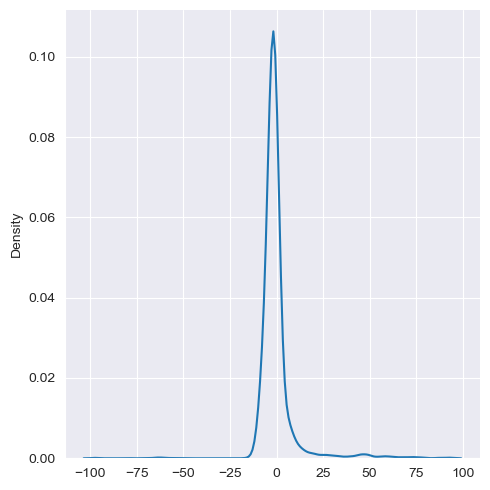

In [247]:
sns.displot(Y_test-Y_hat,kind='kde')